**Author: Pablo Ulises Hernandez Garces**

**link Github: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-UlisesHdzG**

**Data Description**

You are provided with a dataset of  images of  plant seedlings at various stages of  grown.  Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

**Dataset**

The dataset can be download from Olympus. The data file names are:

- images.npy
- Label.csv

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are  also  put  into  the  Labels.csv.  So  that  you  can  work  on  the  data/project  seamlessly  without  worrying  about  the  high  data volume. The following code was used to convert the large dataset of images to numpy array

Link to the Kaggle project site:https://www.kaggle.com/c/plant-seedlings-classification/data?select=train


In [ ]:
# Import necessary libraries.
import math
import numpy as np
import pandas as pd
from glob import glob
data_path = '/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/train.zip'
!mkdir dataset
# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.)
from zipfile import ZipFile
with ZipFile(data_path, 'r') as zip:
 zip.extractall('./dataset')
path = "/content/dataset/*/*.*" # The path to all images in training set. (* means include all folders and files.)
files = glob(path)

trainImg = [] # Initialize empty list to store the image data as numbers.
trainLabel = [] # Initialize empty list to store the labels of images

j = 1
num = len(files)
# Obtain images and resizing, obtain labels
for img in files:
 '''
 Append the image data to trainImg list.
 Append the labels to trainLabel list.
 '''
 print(str(j) + "/" + str(num), end="\r")
 trainImg.append(cv2.resize(cv2.imread(img), (128, 128))) # Get image (with resizing to 128x128)
 trainLabel.append(img.split('/')[-2]) # Get image label (folder name contains the class to which the image belong)
 j += 1
trainImg = np.asarray(trainImg) # Train images set
trainLabel = pd.DataFrame(trainLabel, columns=["Label"]) # Train labels set
print(trainImg.shape)
print(trainLabel.shape)
trainLabel.to_csv('Labels.csv', index=False)
np.save('plantimages', trainImg)


IndentationError: ignored

**Context**

Can you differentiate a weed from a crop seedling? The ability to do so effectively can mean better crop yields and better stewardship of the environment. The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages.

**Objective**

To implement the techniques learnt as a part of the course.

**Learning Outcomes**

- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.
- The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

**Guide to solve the project seamlessly**

Here are the points which will help you to solve the problem efficiently:
- Read  the  problem  statement  carefully  from  start  to  end  (including  the  note  at  the  end).  The  highlighted  part  in  the attached problem statement should not be missed.
- Download the dataset from the Olympus platform.
- Upload the "images.npy"and “Labels.csv” file to google drive.
- Then  you  can  use  the  dataset  path  in  the  Google  Colab  notebook  to  do  further  steps  related  to  project  problem statement.
- You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your model.


**Note** 

- Download the train images from the Olympus Platform.
- Do not download the dataset from Kaggle, as:
  - The dataset is big.
  - The dataset has 2 files for train and test images, but the labels are only for the train file. Test file has no labels associated with it. So, when you want to know the accuracy of model on test images, there’s no way to measure it. That’s why the data provided to you on Olympus has only train images and their labels. For our purpose we use this for our training and testing and validation purpose.

**Steps and tasks**

**1. Import the libraries, load dataset, print shape of data, visualize the 
images in dataset.**

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np                               # Import numpy
import pandas as pd
import random
import cv2


from google.colab.patches import cv2_imshow      # To show images using cv2 module
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
                                                        # Dense: Just your regular densely-connected NN layer.
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models, layers, optimizers
from sklearn.metrics import accuracy_score, confusion_matrix


from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [2]:
# Loading dataset and labels
project_path = '/content/drive/My Drive/AIML/Project 7 - Computer Vision/Data/'
dataset_file = project_path + 'images.npy'
labels_file = project_path + 'Labels.csv'

data = np.load(dataset_file)
labels = pd.read_csv(labels_file)

In [3]:
# data shape
print(data.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


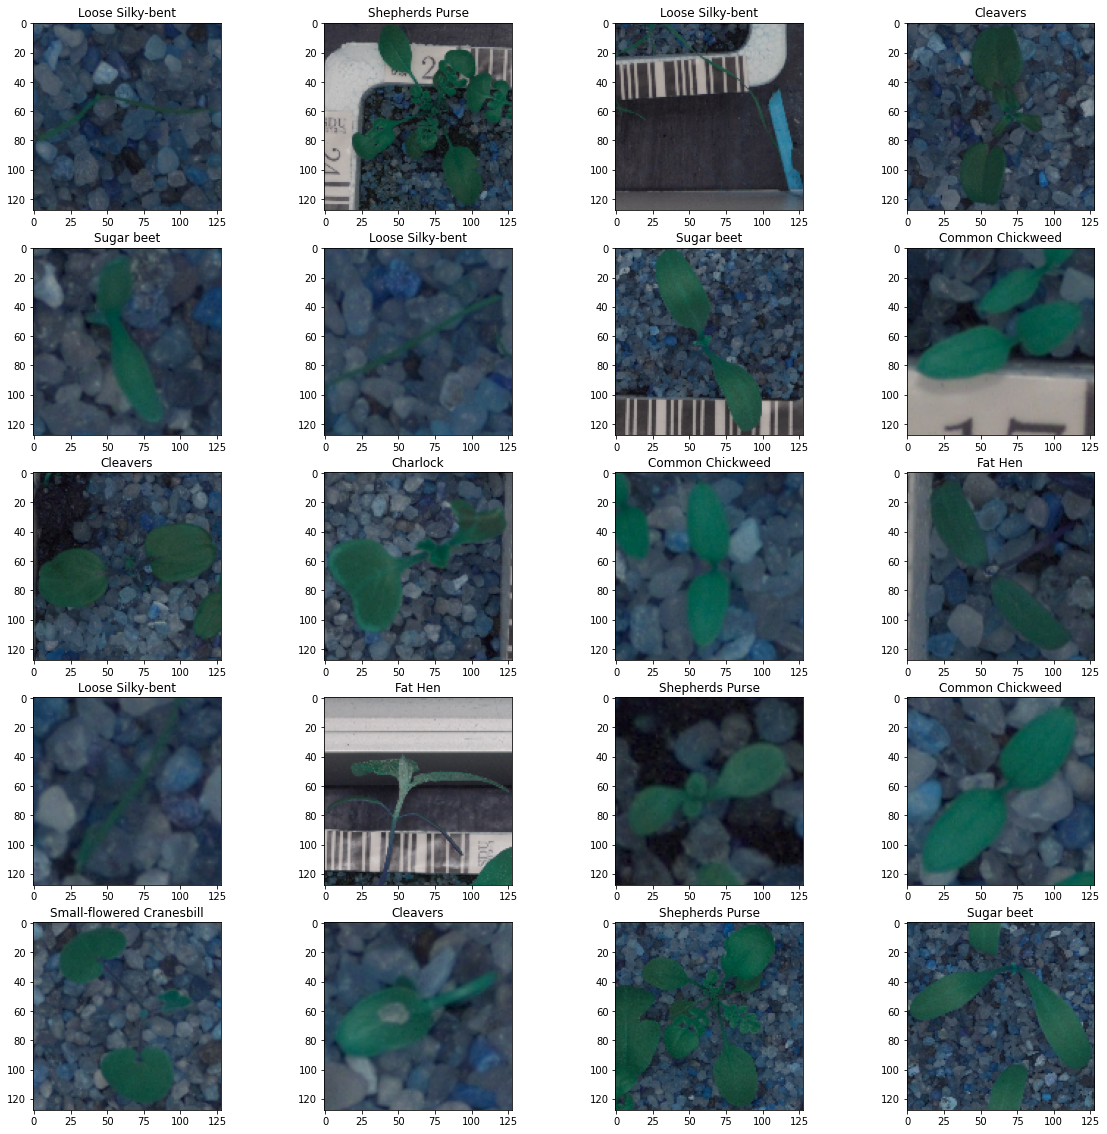

In [4]:
# Showing some images
sample = random.sample(range(0, 4750), 20)
w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
j=1
for i in sample:
  image = data[i]
  label = labels.Label[i]
  fig.add_subplot(rows, columns, j)
  plt.title(label)
  plt.imshow(image)
  j=j+1
plt.show()

**2. Data Pre-processing** 
  * Normalization.
  * Gaussian Blurring.
  * Visualize data after pre-processing.

In [5]:
# normalizing data
X = data.astype('float32')
X /= 255

print("X shape:", X.shape)
print("Images in X:", X.shape[0])
print("Max value in X:", X.max())
print("Min value in X:", X.min())

X shape: (4750, 128, 128, 3)
Images in X: 4750
Max value in X: 1.0
Min value in X: 0.0


In [6]:
# Gaussian Blurring
X_blur = [[]] * X.shape[0]
for i in range(X.shape[0]):
  src = X[i]
  X_blur[i] = cv2.GaussianBlur(src,(5,5),cv2.BORDER_DEFAULT)
  


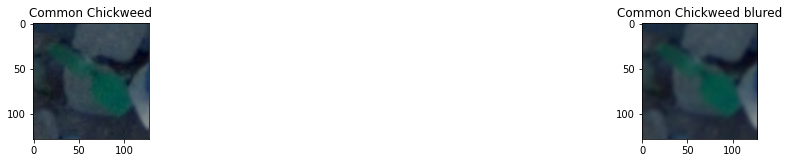

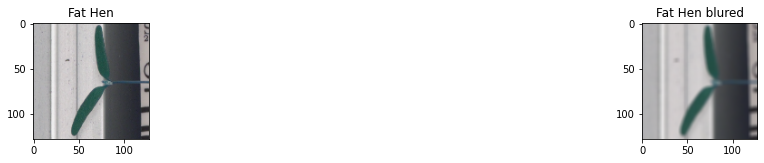

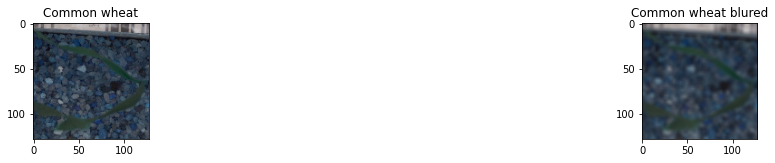

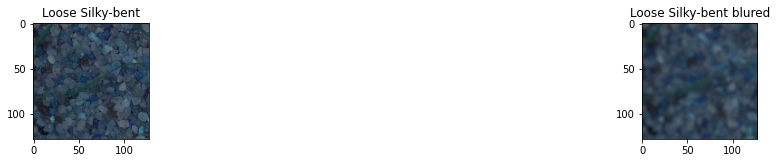

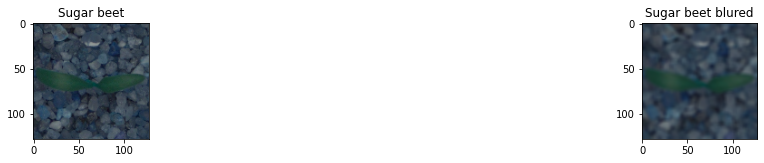

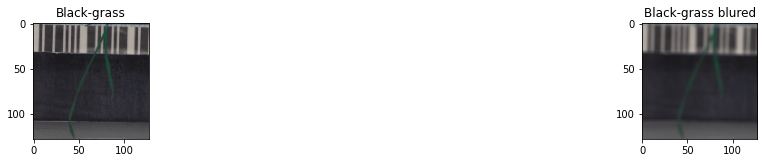

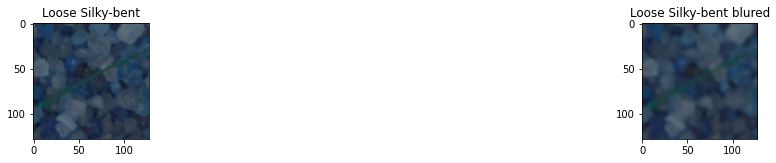

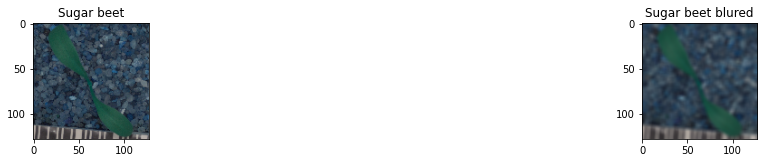

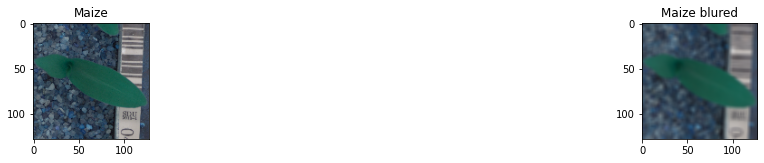

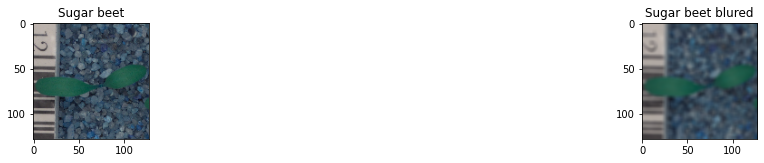

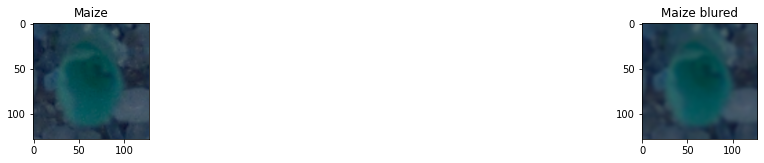

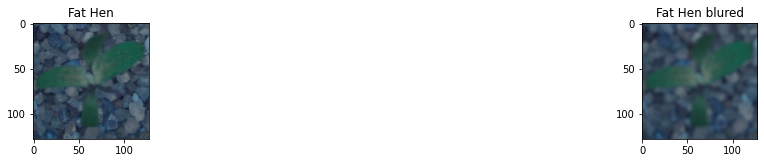

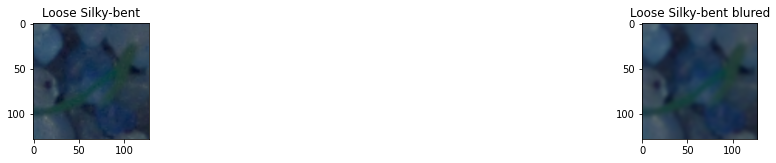

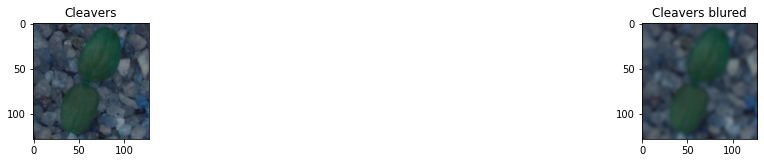

In [7]:
# Visualizing some input and output image

sample = random.sample(range(0, 4750), 14)
w=10
h=10

columns = 2
rows = 8
j=1
for i in sample:
  fig=plt.figure(figsize=(20, 20))
  image = X[i]
  i_blur = X_blur[i]
  label = labels.Label[i]
  fig.add_subplot(rows, columns, 1)
  plt.title(label)
  plt.imshow(image)
  fig.add_subplot(rows, columns, 2)
  plt.title(label + ' blured')
  plt.imshow(i_blur)
  plt.show()

**3. Make data compatible** 
  * Convert labels to one-hot-vectors.
  * Print the label for y_train[0].
  * Split the dataset into training, testing, and validation set.(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
  * Check  the  shape  of  data, Reshape  data  into  shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [8]:
# converting labels to one-hot vectors
enc = LabelBinarizer()
y = enc.fit_transform(labels)

# printing the label and the one-hot representation of label 0
print('Original label of element 0:',labels.Label[0])
print('One-hot representation of element 0:',y[0])

#labels.Label.unique()

Original label of element 0: Small-flowered Cranesbill
One-hot representation of element 0: [0 0 0 0 0 0 0 0 0 0 1 0]


In [9]:
# splitting data set into training, validation and testing sets.

# first splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

# Second splitting into validation and testing sets
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 7)

In [10]:
# Checking the shapes
print('Shape of train set',X_train.shape)
print('Shape of validation set',X_validation.shape)
print('Shape of test set',X_test.shape)

Shape of train set (3325, 128, 128, 3)
Shape of validation set (712, 128, 128, 3)
Shape of test set (713, 128, 128, 3)


The shapes of the data sets are compatibles with Keras models and do not require to reshape them.

**4. Building CNN**
  * Define layers.
  * Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)


In [11]:
# defining layers. I will consider 3 blocks: 
# All blocks have: 
#   - convolutional networks with feature maps of size 5x5, relu as activation function
#   - batch normalization 
#   - convolutional networks with feature maps of size 5x5, relu as activation function
#   - maxpooling with size 2x2
#   - batch normalization 
#   - Dropout 10%

# the first "block" have 64 filters, the second 128 and the last one 256
# I use flatten to provide the imput to the fully connected nn
# aditionally, two blocks of fully connected nn with 256 units, batch normalization and dropout 50%
# finally a layer with 12 units as output with softmax activation function.

model = models.Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=X_train.shape[1:], activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(12, activation='softmax'))

# Setting optimizer and loss function
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 64)      4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 124, 124, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 64)      102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       2

**5. Fit and evaluate model and print confusion matrix.**


In [12]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [13]:
# Fitting the model, defining batch size and epochs
batch_size = 100
epochs = 80
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_validation, y_validation),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

Epoch 1/80
34/34 [==============================] - ETA: 0s - loss: 2.2598 - accuracy: 0.3615
Epoch 00001: val_loss improved from inf to 15.91627, saving model to cifar_cnn_checkpoint_01_loss15.9163.h5
34/34 [==============================] - 12s 339ms/step - loss: 2.2598 - accuracy: 0.3615 - val_loss: 15.9163 - val_accuracy: 0.1320
Epoch 2/80
34/34 [==============================] - ETA: 0s - loss: 1.4068 - accuracy: 0.5534
Epoch 00002: val_loss did not improve from 15.91627
34/34 [==============================] - 10s 302ms/step - loss: 1.4068 - accuracy: 0.5534 - val_loss: 25.6117 - val_accuracy: 0.1320
Epoch 3/80
34/34 [==============================] - ETA: 0s - loss: 1.0818 - accuracy: 0.6562
Epoch 00003: val_loss did not improve from 15.91627
34/34 [==============================] - 10s 305ms/step - loss: 1.0818 - accuracy: 0.6562 - val_loss: 28.4740 - val_accuracy: 0.1320
Epoch 4/80
34/34 [==============================] - ETA: 0s - loss: 0.8888 - accuracy: 0.7044
Epoch 00004: 

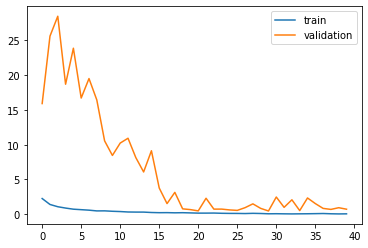

In [14]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [15]:
# evaluating the model
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 1s 36ms/step - loss: 0.7813 - accuracy: 0.8107
Test loss: 0.7813238501548767
Test accuracy: 0.8106591701507568


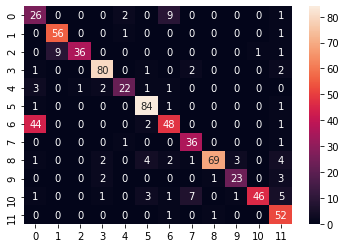

In [16]:
# Confusion matrix
# Prediction with best model


y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = enc.fit_transform(y_pred)


#cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

sns.heatmap(cm,annot=True)

**6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].**


True Label: [0 0 0 1 0 0 0 0 0 0 0 0]
Predicted Label: [0 0 0 1 0 0 0 0 0 0 0 0]
Predicted correctly? True


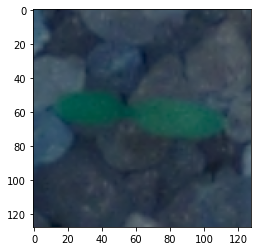

True Label: [0 0 1 0 0 0 0 0 0 0 0 0]
Predicted Label: [0 0 1 0 0 0 0 0 0 0 0 0]
Predicted correctly? True


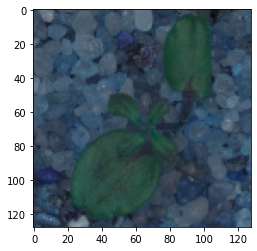

True Label: [0 0 0 0 0 0 0 0 0 1 0 0]
Predicted Label: [0 0 0 0 0 0 0 0 0 1 0 0]
Predicted correctly? True


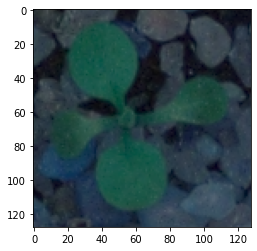

True Label: [0 0 0 0 0 1 0 0 0 0 0 0]
Predicted Label: [0 0 0 0 0 1 0 0 0 0 0 0]
Predicted correctly? True


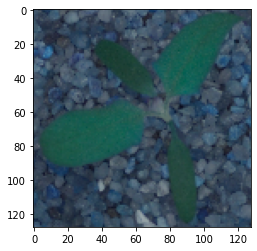

True Label: [0 0 0 0 0 1 0 0 0 0 0 0]
Predicted Label: [0 0 0 0 0 1 0 0 0 0 0 0]
Predicted correctly? True


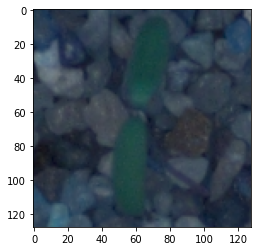

In [17]:
index = [2,3,33,36,59]
for i in index:
  
  image = X_test[i]
  label = y_test[i]
  pred =  y_pred[i]
  accurate = all(label==pred)
  print('True Label:',label)
  print('Predicted Label:',pred)
  print('Predicted correctly?',accurate)
  plt.imshow(image)
  plt.show()

We can see that the CNN fitted predicts well all the examples required. Additionally, from the confusion matrix and the accuracy we can see that the CNN performs well in general terms.